In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tab = pd.read_csv("2022_Test_ML.csv")

In [3]:
tab["d1"] = tab["d"].apply(lambda x: int(2*x))
tab["d2"] = 2*tab["d"] - tab["d1"]
tab["h_p_inverse"] = 1/tab["h_p"]

In [4]:
tab.head()

,ind,s_mt,s_mq,d,h_p,QW,DP,d1,d2,h_p_inverse
0,0,1.409218,1.954108,2.867735,7.811623,1504.175621,501.563016,5,0.735471,0.128014
1,1,1.382565,2.006212,1.545090,8.124248,1240.530500,377.163158,3,0.090180,0.123088
2,2,1.622445,1.386172,1.192385,7.354709,1385.191155,457.404772,2,0.384770,0.135967
3,3,1.786172,1.591984,2.350701,4.324649,1602.841975,1429.795145,4,0.701403,0.231233
4,4,1.995591,2.024449,1.208417,6.993988,1326.290979,514.009143,2,0.416834,0.142980


In [5]:
del tab["ind"]

In [6]:
tab_DP = tab["DP"]
del tab["QW"]
del tab["DP"]

In [7]:
tab.head()

,s_mt,s_mq,d,h_p,d1,d2,h_p_inverse
0,1.409218,1.954108,2.867735,7.811623,5,0.735471,0.128014
1,1.382565,2.006212,1.545090,8.124248,3,0.090180,0.123088
2,1.622445,1.386172,1.192385,7.354709,2,0.384770,0.135967
3,1.786172,1.591984,2.350701,4.324649,4,0.701403,0.231233
4,1.995591,2.024449,1.208417,6.993988,2,0.416834,0.142980


In [8]:
X_full, X_test, y_full, y_test = train_test_split(tab, tab_DP, random_state=239, test_size=0.2)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, random_state=239, test_size=0.2)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scaler.fit(X_train[["d1", "h_p_inverse"]])

StandardScaler()

In [12]:
len(X_train), len(X_val), len(X_test)

(320, 80, 100)

In [13]:
from sklearn.linear_model import Ridge

In [14]:
model_interpretable = Ridge()

In [15]:
model_interpretable.fit(scaler.transform(X_train[["d1", "h_p_inverse"]]), y_train)

Ridge()

In [16]:
preds_train = model_interpretable.predict(scaler.transform(X_train[["d1", "h_p_inverse"]]))
preds_val = model_interpretable.predict(scaler.transform(X_val[["d1", "h_p_inverse"]]))

In [17]:
from sklearn.metrics import r2_score

In [18]:
r2_score(preds_train, y_train), r2_score(preds_val, y_val) 

(0.9332766862151126, 0.9089175934269128)

In [19]:
model_interpretable = Ridge(alpha=2)
model_interpretable.fit(scaler.transform(X_train[["d1", "h_p_inverse"]]), y_train)
preds_train = model_interpretable.predict(scaler.transform(X_train[["d1", "h_p_inverse"]]))
preds_val = model_interpretable.predict(scaler.transform(X_val[["d1", "h_p_inverse"]]))
r2_score(preds_train, y_train), r2_score(preds_val, y_val) 

(0.9328358087829052, 0.908419826659111)

In [20]:
model_interpretable = Ridge(alpha=0.5)
model_interpretable.fit(scaler.transform(X_train[["d1", "h_p_inverse"]]), y_train)
preds_train = model_interpretable.predict(scaler.transform(X_train[["d1", "h_p_inverse"]]))
preds_val = model_interpretable.predict(scaler.transform(X_val[["d1", "h_p_inverse"]]))
r2_score(preds_train, y_train), r2_score(preds_val, y_val)

(0.9334894655813963, 0.9091582833580332)

In [21]:
model_interpretable = Ridge(alpha=0.25)
model_interpretable.fit(scaler.transform(X_train[["d1", "h_p_inverse"]]), y_train)
preds_train = model_interpretable.predict(scaler.transform(X_train[["d1", "h_p_inverse"]]))
preds_val = model_interpretable.predict(scaler.transform(X_val[["d1", "h_p_inverse"]]))
r2_score(preds_train, y_train), r2_score(preds_val, y_val)

(0.9335939403894568, 0.9092765798981212)

In [22]:
model_interpretable = Ridge(alpha=0.1)
model_interpretable.fit(scaler.transform(X_train[["d1", "h_p_inverse"]]), y_train)
preds_train = model_interpretable.predict(scaler.transform(X_train[["d1", "h_p_inverse"]]))
preds_val = model_interpretable.predict(scaler.transform(X_val[["d1", "h_p_inverse"]]))
r2_score(preds_train, y_train), r2_score(preds_val, y_val)

(0.9336560125080371, 0.9093469023157127)

In [23]:
model_interpretable = Ridge(alpha=0.01)
model_interpretable.fit(scaler.transform(X_train[["d1", "h_p_inverse"]]), y_train)
preds_train = model_interpretable.predict(scaler.transform(X_train[["d1", "h_p_inverse"]]))
preds_val = model_interpretable.predict(scaler.transform(X_val[["d1", "h_p_inverse"]]))
r2_score(preds_train, y_train), r2_score(preds_val, y_val)

(0.9336930351821083, 0.9093888597819146)

In [24]:
model_interpretable = Ridge(alpha=0.001)
model_interpretable.fit(scaler.transform(X_train[["d1", "h_p_inverse"]]), y_train)
preds_train = model_interpretable.predict(scaler.transform(X_train[["d1", "h_p_inverse"]]))
preds_val = model_interpretable.predict(scaler.transform(X_val[["d1", "h_p_inverse"]]))
r2_score(preds_train, y_train), r2_score(preds_val, y_val)

(0.9336967283498603, 0.9093930457941376)

In [25]:
model_interpretable = Ridge(alpha=0.0001)
model_interpretable.fit(scaler.transform(X_train[["d1", "h_p_inverse"]]), y_train)
preds_train = model_interpretable.predict(scaler.transform(X_train[["d1", "h_p_inverse"]]))
preds_val = model_interpretable.predict(scaler.transform(X_val[["d1", "h_p_inverse"]]))
r2_score(preds_train, y_train), r2_score(preds_val, y_val)

(0.9336970975756389, 0.9093934642980158)

In [26]:
model_interpretable = Ridge(alpha=0.00001)
model_interpretable.fit(scaler.transform(X_train[["d1", "h_p_inverse"]]), y_train)
preds_train = model_interpretable.predict(scaler.transform(X_train[["d1", "h_p_inverse"]]))
preds_val = model_interpretable.predict(scaler.transform(X_val[["d1", "h_p_inverse"]]))
r2_score(preds_train, y_train), r2_score(preds_val, y_val)

(0.9336971344973067, 0.9093935061474301)

In [27]:
model_interpretable = Ridge(alpha=0.000001)
model_interpretable.fit(scaler.transform(X_train[["d1", "h_p_inverse"]]), y_train)
preds_train = model_interpretable.predict(scaler.transform(X_train[["d1", "h_p_inverse"]]))
preds_val = model_interpretable.predict(scaler.transform(X_val[["d1", "h_p_inverse"]]))
r2_score(preds_train, y_train), r2_score(preds_val, y_val)

(0.9336971381894644, 0.9093935103323618)

In [28]:
model_interpretable.coef_, model_interpretable.intercept_

(array([ 50.01898616, 315.58168285]), 646.008571744286)

In [29]:
from catboost import CatBoostRegressor
from catboost import Pool
import numpy as np

In [30]:
X_train["rand"] = np.random.uniform(size=len(X_train))

<Axes: >

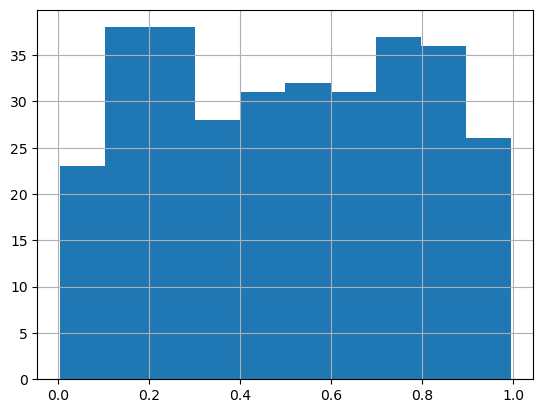

In [31]:
X_train["rand"].hist()

In [32]:
model_arbitrary = CatBoostRegressor()

In [33]:
model_arbitrary.fit(X_train, y_train)

Learning rate set to 0.034197
0:	learn: 324.3901343	total: 146ms	remaining: 2m 25s
1:	learn: 316.6075952	total: 147ms	remaining: 1m 13s
2:	learn: 308.3104125	total: 148ms	remaining: 49.3s
3:	learn: 301.8780611	total: 149ms	remaining: 37.2s
4:	learn: 294.9746005	total: 151ms	remaining: 30s
5:	learn: 287.8482909	total: 152ms	remaining: 25.1s
6:	learn: 281.4303688	total: 153ms	remaining: 21.7s
7:	learn: 275.5697446	total: 154ms	remaining: 19.1s
8:	learn: 269.1033514	total: 155ms	remaining: 17.1s
9:	learn: 263.7020014	total: 156ms	remaining: 15.4s
10:	learn: 257.4787484	total: 157ms	remaining: 14.1s
11:	learn: 251.2617400	total: 158ms	remaining: 13s
12:	learn: 245.4968475	total: 159ms	remaining: 12.1s
13:	learn: 240.1030543	total: 160ms	remaining: 11.3s
14:	learn: 234.1573590	total: 161ms	remaining: 10.6s
15:	learn: 230.3806705	total: 162ms	remaining: 9.99s
16:	learn: 226.1588384	total: 164ms	remaining: 9.46s
17:	learn: 221.5077046	total: 165ms	remaining: 8.98s
18:	learn: 218.3310787	total

223:	learn: 30.3199850	total: 397ms	remaining: 1.37s
224:	learn: 30.1949887	total: 398ms	remaining: 1.37s
225:	learn: 30.1042028	total: 400ms	remaining: 1.37s
226:	learn: 29.8429598	total: 401ms	remaining: 1.36s
227:	learn: 29.6145291	total: 402ms	remaining: 1.36s
228:	learn: 29.5471150	total: 404ms	remaining: 1.36s
229:	learn: 29.4890314	total: 405ms	remaining: 1.35s
230:	learn: 29.4249739	total: 406ms	remaining: 1.35s
231:	learn: 29.3510001	total: 407ms	remaining: 1.35s
232:	learn: 29.2823189	total: 409ms	remaining: 1.34s
233:	learn: 29.2244296	total: 410ms	remaining: 1.34s
234:	learn: 29.1220742	total: 412ms	remaining: 1.34s
235:	learn: 28.9543618	total: 413ms	remaining: 1.34s
236:	learn: 28.6462077	total: 414ms	remaining: 1.33s
237:	learn: 28.4020401	total: 416ms	remaining: 1.33s
238:	learn: 28.1981226	total: 418ms	remaining: 1.33s
239:	learn: 28.1627795	total: 419ms	remaining: 1.33s
240:	learn: 28.0551307	total: 420ms	remaining: 1.32s
241:	learn: 28.0087717	total: 421ms	remaining:

518:	learn: 12.2697155	total: 758ms	remaining: 703ms
519:	learn: 12.2265081	total: 760ms	remaining: 701ms
520:	learn: 12.1908600	total: 761ms	remaining: 700ms
521:	learn: 12.1486701	total: 763ms	remaining: 698ms
522:	learn: 12.1259765	total: 764ms	remaining: 697ms
523:	learn: 12.0890237	total: 765ms	remaining: 695ms
524:	learn: 12.0691009	total: 767ms	remaining: 694ms
525:	learn: 12.0341956	total: 768ms	remaining: 692ms
526:	learn: 12.0049165	total: 769ms	remaining: 691ms
527:	learn: 11.9631693	total: 771ms	remaining: 689ms
528:	learn: 11.9404607	total: 772ms	remaining: 688ms
529:	learn: 11.8928963	total: 774ms	remaining: 686ms
530:	learn: 11.8523674	total: 775ms	remaining: 685ms
531:	learn: 11.8256636	total: 776ms	remaining: 683ms
532:	learn: 11.7688094	total: 777ms	remaining: 681ms
533:	learn: 11.7304259	total: 779ms	remaining: 680ms
534:	learn: 11.6868571	total: 780ms	remaining: 678ms
535:	learn: 11.6640489	total: 781ms	remaining: 676ms
536:	learn: 11.6363892	total: 782ms	remaining:

833:	learn: 5.5501080	total: 1.13s	remaining: 224ms
834:	learn: 5.5384978	total: 1.13s	remaining: 223ms
835:	learn: 5.5300071	total: 1.13s	remaining: 222ms
836:	learn: 5.5241063	total: 1.13s	remaining: 220ms
837:	learn: 5.5111028	total: 1.13s	remaining: 219ms
838:	learn: 5.4978067	total: 1.13s	remaining: 218ms
839:	learn: 5.4813656	total: 1.14s	remaining: 216ms
840:	learn: 5.4726864	total: 1.14s	remaining: 215ms
841:	learn: 5.4655828	total: 1.14s	remaining: 214ms
842:	learn: 5.4449691	total: 1.14s	remaining: 212ms
843:	learn: 5.4238578	total: 1.14s	remaining: 211ms
844:	learn: 5.4093536	total: 1.14s	remaining: 209ms
845:	learn: 5.3954820	total: 1.14s	remaining: 208ms
846:	learn: 5.3827297	total: 1.14s	remaining: 207ms
847:	learn: 5.3685189	total: 1.15s	remaining: 205ms
848:	learn: 5.3657150	total: 1.15s	remaining: 204ms
849:	learn: 5.3565683	total: 1.15s	remaining: 203ms
850:	learn: 5.3456184	total: 1.15s	remaining: 201ms
851:	learn: 5.3343710	total: 1.15s	remaining: 200ms
852:	learn: 

999:	learn: 3.9481116	total: 1.31s	remaining: 0us


In [34]:
importances = model_arbitrary.get_feature_importance()
imp_df = pd.DataFrame({"col": X_train.columns, "val": importances})
imp_df.sort_values("val", ascending=False)

,col,val
3,h_p,44.926830
6,h_p_inverse,33.332773
2,d,7.379561
4,d1,4.450969
5,d2,4.005198
0,s_mt,2.180876
1,s_mq,2.116052
7,rand,1.607742


In [35]:
del X_train["rand"]
del X_train["s_mt"]
del X_train["s_mq"]
del X_val["s_mt"]
del X_val["s_mq"]
del X_test["s_mt"]
del X_test["s_mq"]

In [36]:
model_arbitrary = CatBoostRegressor(use_best_model=True, eval_metric="R2")

In [37]:
model_arbitrary.fit(X_train, y_train, eval_set=Pool(data=X_val, label=y_val))

Learning rate set to 0.04258
0:	learn: 0.0681604	test: 0.0228832	best: 0.0228832 (0)	total: 1.39ms	remaining: 1.39s
1:	learn: 0.1238276	test: 0.0847956	best: 0.0847956 (1)	total: 2.45ms	remaining: 1.22s
2:	learn: 0.1734594	test: 0.1358178	best: 0.1358178 (2)	total: 3.5ms	remaining: 1.16s
3:	learn: 0.2228549	test: 0.1902864	best: 0.1902864 (3)	total: 4.1ms	remaining: 1.02s
4:	learn: 0.2719952	test: 0.2418950	best: 0.2418950 (4)	total: 5.34ms	remaining: 1.06s
5:	learn: 0.3125802	test: 0.2825728	best: 0.2825728 (5)	total: 6.49ms	remaining: 1.07s
6:	learn: 0.3502111	test: 0.3188162	best: 0.3188162 (6)	total: 7.58ms	remaining: 1.07s
7:	learn: 0.3881465	test: 0.3576849	best: 0.3576849 (7)	total: 8.61ms	remaining: 1.07s
8:	learn: 0.4210616	test: 0.3897076	best: 0.3897076 (8)	total: 9.65ms	remaining: 1.06s
9:	learn: 0.4541508	test: 0.4219884	best: 0.4219884 (9)	total: 10.7ms	remaining: 1.06s
10:	learn: 0.4867417	test: 0.4559927	best: 0.4559927 (10)	total: 12ms	remaining: 1.08s
11:	learn: 0.514

159:	learn: 0.9889792	test: 0.9732781	best: 0.9732781 (159)	total: 176ms	remaining: 923ms
160:	learn: 0.9891063	test: 0.9732802	best: 0.9732802 (160)	total: 177ms	remaining: 924ms
161:	learn: 0.9892204	test: 0.9733587	best: 0.9733587 (161)	total: 178ms	remaining: 923ms
162:	learn: 0.9893838	test: 0.9736926	best: 0.9736926 (162)	total: 179ms	remaining: 922ms
163:	learn: 0.9895154	test: 0.9737076	best: 0.9737076 (163)	total: 180ms	remaining: 920ms
164:	learn: 0.9896385	test: 0.9738158	best: 0.9738158 (164)	total: 182ms	remaining: 919ms
165:	learn: 0.9896637	test: 0.9738190	best: 0.9738190 (165)	total: 183ms	remaining: 918ms
166:	learn: 0.9897101	test: 0.9738635	best: 0.9738635 (166)	total: 184ms	remaining: 917ms
167:	learn: 0.9898171	test: 0.9739568	best: 0.9739568 (167)	total: 185ms	remaining: 916ms
168:	learn: 0.9899109	test: 0.9739548	best: 0.9739568 (167)	total: 186ms	remaining: 915ms
169:	learn: 0.9900104	test: 0.9739617	best: 0.9739617 (169)	total: 187ms	remaining: 914ms
170:	learn

318:	learn: 0.9969826	test: 0.9822513	best: 0.9822513 (318)	total: 356ms	remaining: 760ms
319:	learn: 0.9970220	test: 0.9823377	best: 0.9823377 (319)	total: 358ms	remaining: 760ms
320:	learn: 0.9970418	test: 0.9823935	best: 0.9823935 (320)	total: 359ms	remaining: 759ms
321:	learn: 0.9970627	test: 0.9824492	best: 0.9824492 (321)	total: 360ms	remaining: 758ms
322:	learn: 0.9971039	test: 0.9825113	best: 0.9825113 (322)	total: 361ms	remaining: 756ms
323:	learn: 0.9971343	test: 0.9825332	best: 0.9825332 (323)	total: 362ms	remaining: 755ms
324:	learn: 0.9971447	test: 0.9825297	best: 0.9825332 (323)	total: 363ms	remaining: 754ms
325:	learn: 0.9971550	test: 0.9825090	best: 0.9825332 (323)	total: 364ms	remaining: 752ms
326:	learn: 0.9971874	test: 0.9825926	best: 0.9825926 (326)	total: 365ms	remaining: 751ms
327:	learn: 0.9972082	test: 0.9826590	best: 0.9826590 (327)	total: 366ms	remaining: 750ms
328:	learn: 0.9972375	test: 0.9827327	best: 0.9827327 (328)	total: 367ms	remaining: 749ms
329:	learn

486:	learn: 0.9989074	test: 0.9850188	best: 0.9850188 (486)	total: 539ms	remaining: 568ms
487:	learn: 0.9989118	test: 0.9850196	best: 0.9850196 (487)	total: 540ms	remaining: 567ms
488:	learn: 0.9989146	test: 0.9850218	best: 0.9850218 (488)	total: 542ms	remaining: 566ms
489:	learn: 0.9989250	test: 0.9850493	best: 0.9850493 (489)	total: 543ms	remaining: 565ms
490:	learn: 0.9989287	test: 0.9850537	best: 0.9850537 (490)	total: 544ms	remaining: 564ms
491:	learn: 0.9989347	test: 0.9850549	best: 0.9850549 (491)	total: 545ms	remaining: 563ms
492:	learn: 0.9989413	test: 0.9850745	best: 0.9850745 (492)	total: 546ms	remaining: 562ms
493:	learn: 0.9989450	test: 0.9850651	best: 0.9850745 (492)	total: 548ms	remaining: 561ms
494:	learn: 0.9989488	test: 0.9850664	best: 0.9850745 (492)	total: 549ms	remaining: 560ms
495:	learn: 0.9989551	test: 0.9850623	best: 0.9850745 (492)	total: 550ms	remaining: 559ms
496:	learn: 0.9989581	test: 0.9850816	best: 0.9850816 (496)	total: 551ms	remaining: 558ms
497:	learn

653:	learn: 0.9994711	test: 0.9856499	best: 0.9856537 (643)	total: 720ms	remaining: 381ms
654:	learn: 0.9994727	test: 0.9856542	best: 0.9856542 (654)	total: 722ms	remaining: 380ms
655:	learn: 0.9994764	test: 0.9856545	best: 0.9856545 (655)	total: 723ms	remaining: 379ms
656:	learn: 0.9994793	test: 0.9856545	best: 0.9856545 (656)	total: 724ms	remaining: 378ms
657:	learn: 0.9994806	test: 0.9856439	best: 0.9856545 (656)	total: 725ms	remaining: 377ms
658:	learn: 0.9994830	test: 0.9856553	best: 0.9856553 (658)	total: 726ms	remaining: 376ms
659:	learn: 0.9994853	test: 0.9856671	best: 0.9856671 (659)	total: 727ms	remaining: 375ms
660:	learn: 0.9994868	test: 0.9856590	best: 0.9856671 (659)	total: 728ms	remaining: 373ms
661:	learn: 0.9994875	test: 0.9856592	best: 0.9856671 (659)	total: 729ms	remaining: 372ms
662:	learn: 0.9994898	test: 0.9856693	best: 0.9856693 (662)	total: 730ms	remaining: 371ms
663:	learn: 0.9994939	test: 0.9856874	best: 0.9856874 (663)	total: 731ms	remaining: 370ms
664:	learn

815:	learn: 0.9997054	test: 0.9861195	best: 0.9861195 (815)	total: 901ms	remaining: 203ms
816:	learn: 0.9997068	test: 0.9861125	best: 0.9861195 (815)	total: 902ms	remaining: 202ms
817:	learn: 0.9997074	test: 0.9861133	best: 0.9861195 (815)	total: 903ms	remaining: 201ms
818:	learn: 0.9997083	test: 0.9861081	best: 0.9861195 (815)	total: 904ms	remaining: 200ms
819:	learn: 0.9997097	test: 0.9861180	best: 0.9861195 (815)	total: 905ms	remaining: 199ms
820:	learn: 0.9997106	test: 0.9861197	best: 0.9861197 (820)	total: 906ms	remaining: 198ms
821:	learn: 0.9997115	test: 0.9861166	best: 0.9861197 (820)	total: 907ms	remaining: 196ms
822:	learn: 0.9997128	test: 0.9861135	best: 0.9861197 (820)	total: 908ms	remaining: 195ms
823:	learn: 0.9997132	test: 0.9861169	best: 0.9861197 (820)	total: 910ms	remaining: 194ms
824:	learn: 0.9997141	test: 0.9861174	best: 0.9861197 (820)	total: 911ms	remaining: 193ms
825:	learn: 0.9997151	test: 0.9861208	best: 0.9861208 (825)	total: 912ms	remaining: 192ms
826:	learn

917:	learn: 0.9997871	test: 0.9864083	best: 0.9864084 (916)	total: 1.01s	remaining: 90.3ms
918:	learn: 0.9997876	test: 0.9864078	best: 0.9864084 (916)	total: 1.01s	remaining: 89.2ms
919:	learn: 0.9997882	test: 0.9864167	best: 0.9864167 (919)	total: 1.01s	remaining: 88.1ms
920:	learn: 0.9997885	test: 0.9864167	best: 0.9864167 (920)	total: 1.01s	remaining: 87ms
921:	learn: 0.9997889	test: 0.9864178	best: 0.9864178 (921)	total: 1.01s	remaining: 85.9ms
922:	learn: 0.9997895	test: 0.9864190	best: 0.9864190 (922)	total: 1.02s	remaining: 84.8ms
923:	learn: 0.9997901	test: 0.9864254	best: 0.9864254 (923)	total: 1.02s	remaining: 83.7ms
924:	learn: 0.9997912	test: 0.9864312	best: 0.9864312 (924)	total: 1.02s	remaining: 82.6ms
925:	learn: 0.9997917	test: 0.9864312	best: 0.9864312 (925)	total: 1.02s	remaining: 81.5ms
926:	learn: 0.9997928	test: 0.9864314	best: 0.9864314 (926)	total: 1.02s	remaining: 80.4ms
927:	learn: 0.9997929	test: 0.9864315	best: 0.9864315 (927)	total: 1.02s	remaining: 79.3ms
9

In [38]:
preds_train = model_arbitrary.predict(X_train)
preds_val = model_arbitrary.predict(X_val)
r2_score(preds_train, y_train), r2_score(preds_val, y_val)

(0.9998285365084257, 0.9856851311566048)

In [39]:
importances = model_arbitrary.get_feature_importance()

In [40]:
imp_df = pd.DataFrame({"col": X_train.columns, "val": importances})
imp_df.sort_values("val", ascending=False)

,col,val
4,h_p_inverse,44.478859
1,h_p,35.355826
0,d,8.443145
3,d2,6.260291
2,d1,5.461879


In [41]:
preds_test = model_arbitrary.predict(X_test)
r2_score(preds_test, y_test)

0.9881628735222361

In [42]:
vis_df = pd.DataFrame({"pred": preds_test, "truth": y_test})

In [43]:
vis_df["error"] = 100*(vis_df["pred"] - vis_df["truth"])/vis_df[["pred", "truth"]].max(axis=1)

Text(0.5, 0, 'relative error')

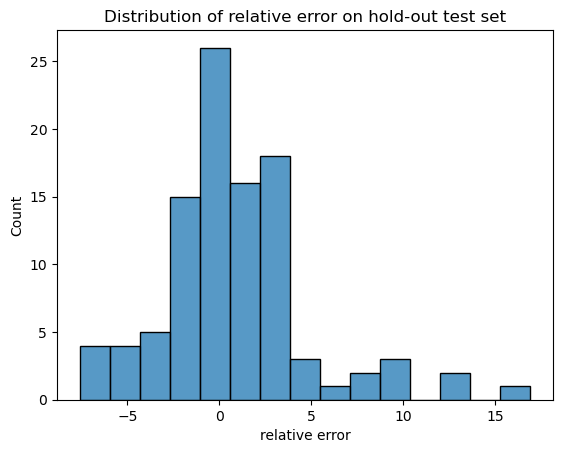

In [44]:
sns.histplot(vis_df["error"])
plt.title("Distribution of relative error on hold-out test set")
plt.xlabel("relative error")

Conclusions:

1. We are considering ridge linear regression as an interpretable linear model, since we have already chosen the features for it during the EDA.
2. The interpretable linear model has good quality (r^2 = 0.91), so we could use it alone.
3. Features s_mt and s_mq are only a bit better than the random feature, that is why we do not consider them.
4. The catboost model has r^2 = 0.99, on the hold-out test set. The distribution of errors also looks pretty fine.